In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
plt.style.use("dark_background")
import statsmodels.formula.api as smf
import plotly.express as px

# CEO-Request Challenge

## Problem statement (summarized)

How should Olist improve it's profit margin, given that it has
- revenues per sellers per months
- revenues per orders
- reputation costs (estimated) per bad reviews
- operational costs of IT system that grows with number of orders, but not linearly (scale effects)

We advise you to start with the following analysis

🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

To analyse the impact of removing the worse sellers from Olist's marketplace, we will perform a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? (granted, it's hard to know in advance who is a good seller, but let's start with this and iterate later).

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

* get sellers df
* calculate revenue
* count dim_is_one_star * cost
* profits
* number of orders

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 

</details>


## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will present your insights to Olist's CEO next time, after the `Communicate your Data Analysis insights` day!

In [2]:
from olist.seller import Seller
sellers_raw = Seller().get_training_data()

In [3]:
sellers = sellers_raw.copy()

## Revenues

In [4]:
sellers['revenues'] = round(0.1 * sellers['sales'] + sellers['months_on_olist'] * 80, 1)

## Costs

In [5]:
sellers['costs'] = round(100 * sellers['count_of_one_star'] + 50 * sellers['count_of_two_star'] + 40 * sellers['count_of_three_star'], 1)

## Profits

In [6]:
sellers['profits'] = sellers['revenues'] - sellers['costs']

In [7]:
sellers['revenues_per_n_orders'] =  sellers['revenues'] / sellers['n_orders']

In [9]:
sellers.drop(['seller_city', 'seller_state', 'delay_to_carrier',
       'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist',
       'quantity', 'quantity_per_order', 'sales',
       'share_of_five_stars', 'share_of_one_stars'], 1, inplace=True)

/var/folders/_7/bhnzdc191yv6brswc0vzw5sr0000gn/T/ipykernel_35962/1417762395.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sellers.drop(['seller_city', 'seller_state', 'delay_to_carrier',


In [10]:
sellers.sort_values('profits', ascending=False, inplace=True)

In [11]:
sellers_optimal = sellers[(sellers['profits'] > 0) | ((sellers['profits'] > -700) & (sellers['revenues'] > 5000))]

In [12]:
it_costs_optimal =  500000 / np.sqrt(sellers['n_orders'].sum()) * np.sqrt(sellers_optimal['n_orders'].sum())

In [14]:
sellers_optimal['revenues'].sum()

2334658.9

In [15]:
sellers_optimal.sort_values('profits', ascending=False, inplace=True)

/Users/christianklaus/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
sellers_optimal

,seller_id,n_orders,review_score,count_of_one_star,count_of_two_star,count_of_three_star,count_of_four_star,count_of_five_star,revenues,costs,profits,revenues_per_n_orders
868,53243585a1d6dc2643021fd1853d8905,358,4.132022,34,9,33,80,200,23237.6,5170,18067.6,64.909497
67,7e93a43ef30c4f03f38b393420bc753a,336,4.214925,34,6,25,59,211,19323.2,4700,14623.2,57.509524
534,fa1c13f2614d7b5c4749cbc52fecda94,585,4.339071,50,11,24,103,393,21004.2,6510,14494.2,35.904615
2151,edb1ef5e36e0c8cd84eb3c9b003e486d,166,4.421687,11,2,8,30,115,8808.5,1520,7288.5,53.063253
2830,46dc3b2cc0980fb8ec44634e21d2718e,521,4.194175,58,10,30,93,324,14571.1,7500,7071.1,27.967562
...,...,...,...,...,...,...,...,...,...,...,...,...
1203,90b36c5aeb728d5504a39f435bef0c5f,5,4.200000,1,0,0,0,4,100.8,100,0.8,20.160000
2239,77128dec4bec4878c37ab7d6169d6f26,1,5.000000,0,0,0,0,1,0.6,0,0.6,0.600000
183,e819bcfade7b5d88a27325eb6cfd62c5,5,4.200000,1,0,0,0,4,100.3,100,0.3,20.060000
1957,c826c40d7b19f62a09e2d7c5e7295ee2,354,4.079545,51,4,16,76,205,5524.4,5940,-415.6,15.605650


Text(0.5, 0, 'seller id')

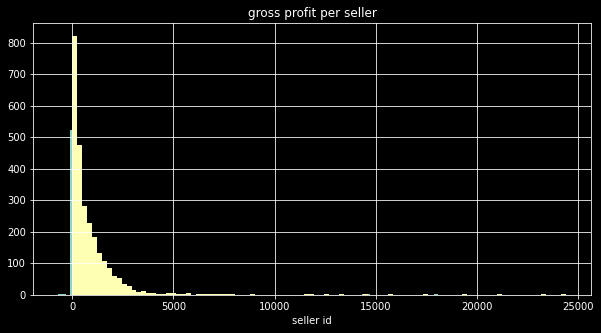

In [17]:
sorted_sellers = sellers_optimal.sort_values(by='profits')[['profits', 'revenues_per_n_orders', 'revenues']].reset_index()
sorted_sellers.head()

plt.figure(figsize=(10,5))
sorted_sellers.profits.hist(bins=100)
sorted_sellers.revenues.hist(bins=100)
plt.title('gross profit per seller')
plt.xlabel('seller id')

In [19]:
# Only pyplot can easily make a graph interactive in notebook AND slides
import plotly.express as px
df = sellers[(sellers['profits'] < 200) & (sellers['profits'] > -200)]
fig = px.scatter(df, y="profits", size="revenues", color='revenues_per_n_orders',
           size_max=60)
fig.show() 

In [ ]:
sellers_optimal_plot = sorted_sellers[(sorted_sellers['profits'] < 500) & (sorted_sellers['profits'] > 0)]

In [ ]:
# Only pyplot can easily make a graph interactive in notebook AND slides
import plotly.express as px
df = sellers_optimal_plot
fig = px.scatter(df, y="profits", size="revenues_per_n_orders", color='revenues',
           size_max=60)
#fig.update_layout(yaxis_range=[-700,2600])
fig.show()